In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


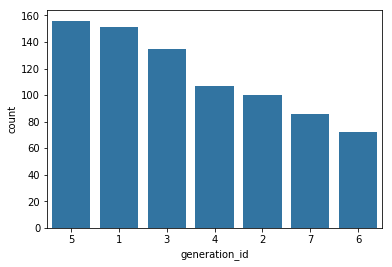

In [6]:
sb.countplot(data=pokemon, x='generation_id', color= base_color, order=gen_order);

In [4]:
base_color = sb.color_palette()[0]

In [5]:
gen_order = pokemon['generation_id'].value_counts().index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

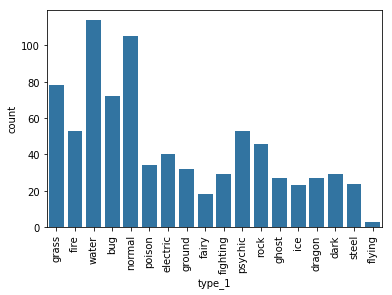

In [10]:
sb.countplot(data=pokemon, x='type_1', color=base_color);
plt.xticks(rotation=90)

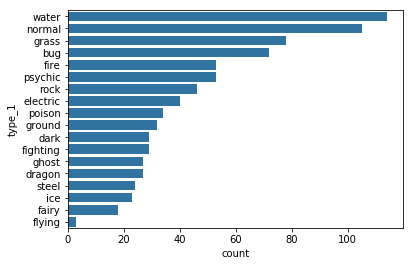

In [11]:
sb.countplot(data=pokemon, y='type_1', color=base_color, order=gen_order);

In [9]:
gen_order = pokemon['type_1'].value_counts().index

In [18]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                         value_vars = ['type_1', 'type_2'],
                         var_name = 'type_level', value_name='type')
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [20]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

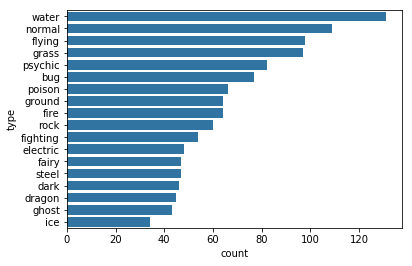

In [21]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y = 'type', color=base_color, order=type_order)

In [22]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.162329615861


In [26]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = [ '{:0.2f}'.format(v) for v in tick_props]
tick_props

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16])

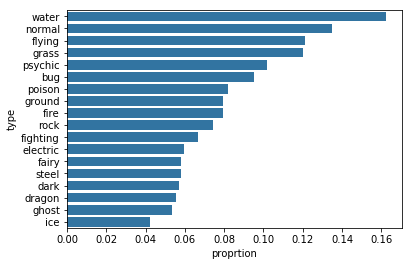

In [27]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y = 'type', color=base_color, order=type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proprtion');

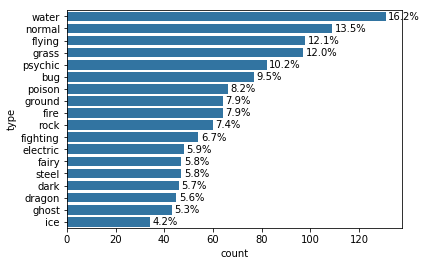

In [28]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y = 'type', color=base_color, order=type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i,pct_string, va='center');